In [102]:
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import multiscale_graphcorr
import dcor
import matplotlib.pyplot as plt
from numpy.random import shuffle
import pingouin as pg
import pandas as pd
import seaborn as sns

In [2]:
#теоретическая задача 1

In [66]:
# i) 
# a)
X = norm.rvs(0, 2, 100)
U = norm.rvs(0, 2, 100)
f = 2 * X + 5 + U
print(spearmanr(f, X))
print(pearsonr(f, X))
print(kendalltau(f, X))
mgc = multiscale_graphcorr(f, X)
print(mgc.stat, mgc.pvalue)

# c)
X = norm.rvs(0, 2, 100)
U = norm.rvs(0, 2, 100)
f = np.abs(np.abs(X) -1) + U
print(spearmanr(f, X))
print(pearsonr(f, X))
print(kendalltau(f, X))
mgc = multiscale_graphcorr(f, X)
print(mgc.stat, mgc.pvalue)

# e)
X = norm.rvs(0, 2, 100)
U = norm.rvs(0, 2, 100)
f = np.sin(X) + U
print(spearmanr(f, X))
print(pearsonr(f, X))
print(kendalltau(f, X))
mgc = multiscale_graphcorr(f, X)
print(mgc.stat, mgc.pvalue)

SpearmanrResult(correlation=0.9104350435043503, pvalue=2.3731626631719985e-39)
(0.9071522043405107, 1.2773207734514893e-38)
KendalltauResult(correlation=0.7296969696969698, pvalue=5.495444605754814e-27)
0.7896802228548093 0.001
SpearmanrResult(correlation=-0.05020102010201019, pvalue=0.6198862147939939)
(-0.10666202137249578, 0.29086464689974856)
KendalltauResult(correlation=-0.03636363636363637, pvalue=0.5919163776641385)
0.004407093950517303 0.265
SpearmanrResult(correlation=0.19323132313231323, pvalue=0.054077566210699146)
(0.15502042734253857, 0.12355058062737889)
KendalltauResult(correlation=0.12080808080808082, pvalue=0.07492652745889762)
0.08246209714451218 0.011


In [67]:
#теоретическая задача 2

(-0.06245029017299217, 0.537067011335314)
0.10030431005034489 0.001
HypothesisTest(p_value=0.041659772790506255, statistic=1.732098906670524)
(-0.19178058384725025, 0.05594325418365832)
0.028197989329177612 0.06
HypothesisTest(p_value=0.024318650197978298, statistic=1.9722544721749975)
(0.08659771467680741, 0.39161038416843985)
-0.0051014630099863465 0.486
HypothesisTest(p_value=0.6386985083184542, statistic=-0.3550027327180042)


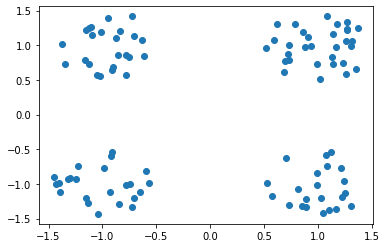

In [78]:
#i)
a = 0.5
b = 1
S = uniform.rvs(a**2, b**2, 100)
fi = uniform.rvs(0, 2*np.pi, 100)
r = np.sqrt(S)
X = r*np.cos(fi)
Y = r*np.sin(fi)
print(pearsonr(X, Y))
mgc = multiscale_graphcorr(X, Y)
print(mgc.stat, mgc.pvalue)
print(dcor.independence.distance_correlation_t_test(X, Y))
#plt.scatter(X, Y)
#ii)
X = uniform.rvs(-1, 1, 100)
Y = uniform.rvs(-1, 1, 100)
print(pearsonr(X, Y))
mgc = multiscale_graphcorr(X, Y)
print(mgc.stat, mgc.pvalue)
print(dcor.independence.distance_correlation_t_test(X, Y))
#iii)
S = uniform.rvs(0, 0.25, 100)
fi = uniform.rvs(0, 2*np.pi, 100)
r = np.sqrt(S)
X = r*np.cos(fi)
Y = r*np.sin(fi)
c = [-1, 1]
for i in range(100):
    shuffle(c)
    X[i] = X[i] + c[0]
    shuffle(c)
    Y[i] = Y[i] + c[0]
plt.scatter(X, Y)
print(pearsonr(X, Y))
mgc = multiscale_graphcorr(X, Y)
print(mgc.stat, mgc.pvalue)
print(dcor.independence.distance_correlation_t_test(X, Y))

In [79]:
#теоретическая задача 3

,0,1,2,3,4,5
0,1.000000,0.559946,0.266925,-0.444256,-0.546464,0.584570
1,0.559946,1.000000,0.386458,-0.050101,0.989116,0.005167
2,0.266925,0.386458,1.000000,-0.233950,-0.492374,-0.919366
3,-0.444256,-0.050101,-0.233950,1.000000,-0.065803,-0.173817
4,-0.546464,0.989116,-0.492374,-0.065803,1.000000,-0.114996
5,0.584570,0.005167,-0.919366,-0.173817,-0.114996,1.000000


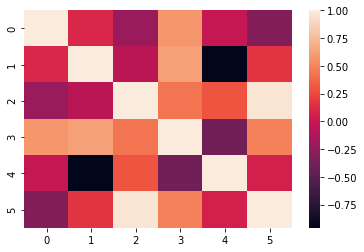

In [104]:
X = norm.rvs(0, 1, 100)
Y = norm.rvs(0, 1, 100)
Z = norm.rvs(0, 1, 100)
A = np.asarray([[1,1,1],[0.1, -0.7, 0.2],[-0.1, 0.2, 0.8]])
U, V, W = A.dot(np.asarray([X, Y, Z]))
res = pd.DataFrame(np.asarray([X, Y, Z, U, V, W]).T)
sns.heatmap(res.corr())
pg.pcorr(res)

In [ ]:
# практическая задача 1

In [146]:
df = pd.read_csv('baby.txt', delimiter = "\s+")
#pg.pcorr(df)
print(len(df))
df = df[df['gestation']!=999]
df = df[df['height']!=99]
df = df[df['weight']!=999]
df = df[df['smoke']!=9]
print(len(df))
df.corr()

1236
1175


,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.407574,-0.043805,0.023519,0.203753,0.155833,-0.246833
gestation,0.407574,1.000000,0.081122,-0.054647,0.070616,0.023477,-0.060693
parity,-0.043805,0.081122,1.000000,-0.336128,0.043745,-0.096572,-0.010224
age,0.023519,-0.054647,-0.336128,1.000000,-0.010178,0.143139,-0.051396
height,0.203753,0.070616,0.043745,-0.010178,1.000000,0.435054,0.017053
weight,0.155833,0.023477,-0.096572,0.143139,0.435054,1.000000,-0.059748
smoke,-0.246833,-0.060693,-0.010224,-0.051396,0.017053,-0.059748,1.000000


In [135]:
pg.pcorr(df)

,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.407831,-0.085467,0.000229,0.162551,0.057867,-0.249564
gestation,0.407831,1.000000,0.091320,-0.030390,-0.011408,-0.022249,0.046081
parity,-0.085467,0.091320,1.000000,-0.319043,0.083531,-0.075835,-0.051656
age,0.000229,-0.030390,-0.319043,1.000000,-0.047969,0.125106,-0.049261
height,0.162551,-0.011408,0.083531,-0.047969,1.000000,0.429038,0.089027
weight,0.057867,-0.022249,-0.075835,0.125106,0.429038,1.000000,-0.052837
smoke,-0.249564,0.046081,-0.051656,-0.049261,0.089027,-0.052837,1.000000


In [136]:
# практическая задача 2

In [148]:
df = pd.read_csv('country_without_asteriks.txt', delimiter = "\s+")
df.corr()

,lf,tv,ph,lf_g,lf_m
lf,1.000000,-0.605847,-0.587480,0.995844,0.993256
tv,-0.605847,1.000000,0.619713,-0.596338,-0.610660
ph,-0.587480,0.619713,1.000000,-0.573852,-0.597759
lf_g,0.995844,-0.596338,-0.573852,1.000000,0.978569
lf_m,0.993256,-0.610660,-0.597759,0.978569,1.000000


In [149]:
pg.pcorr(df)

,lf,tv,ph,lf_g,lf_m
lf,1.000000,-0.296500,-0.326077,0.631916,-0.761398
tv,-0.296500,1.000000,0.401591,0.000315,-0.069297
ph,-0.326077,0.401591,1.000000,0.089780,-0.151017
lf_g,0.631916,0.000315,0.089780,1.000000,0.983584
lf_m,-0.761398,-0.069297,-0.151017,0.983584,1.000000
